### Assignment 1: Detecting the Widest Mouth Open Frame in a Video

**Objective:**  
Detecting facial expressions and specific mouth movements, such as the widest opening, is a fundamental technique in computer vision and human-computer interaction. The mouth's movement is highly expressive, and analyzing it has become important in areas like emotion recognition, where open mouth gestures can signal surprise, joy, or vocal sounds.  In this assignment, please design a Python script that analyzes a video of a person talking. Your task is to output the frame where the person's mouth is open the widest.

**Requirements:**

1. **Input:**  
   - Your script should accept a video file (e.g., `.mp4`) containing a person speaking.

2. **Output:**  
   - Display the frame where the mouth is open the widest.
   - Show the index of this frame within the video.

3. **Additional Guidance:**  
   - Use the face detection algorithm to analyze each frame of the video and measure the openness of the mouth in each frame.

## Importing all the libraries and loading the video


In [49]:
from IPython.display import Video
import cv2
import numpy as np
import matplotlib.pyplot as plt
import face_alignment
import torch
from tqdm import tqdm

Video('test_video_3.mp4')

## Setup the model for facial coordinates

In [50]:
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_D, device=device) 
print (device)

cpu


##  Extract and load the video

In [51]:
video_path = 'test_video_3.mp4'
cap = cv2.VideoCapture(video_path) 
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"Total frames extracted: {frame_count}")

Total frames extracted: 103


## Processing loop

In [52]:
frames_data = []
frame_idx = 0

print("Calculating widths for all frames")
print("-" * 30)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    preds = fa.get_landmarks(rgb_frame)
    
    if preds:
        landmarks = preds[0] # use Dlib 68-point facial landmark scheme
        # Landmarks 48 and 54 are the mouth corners based on DLib facial landmark
        width = np.linalg.norm(landmarks[48] - landmarks[54]) # use Euclidean distance formula to calculate width of the lips
        print(f"frame {frame_idx + 1} : {width:.4f}")
        
        frames_data.append({
            'frame_index': frame_idx + 1,
            'width': width,
            'landmarks': landmarks,
            'image': rgb_frame
        })
    else:
        print(f"frame {frame_idx + 1} : No face detected")
        
    frame_idx += 1

cap.release()

# After the loop, find and show the highest width
if frames_data:
    best_entry = max(frames_data, key=lambda x: x['width'])
    print("-" * 30)
    print(f"Widest mouth found at frame {best_entry['frame_index']} with width {best_entry['width']:.4f}")

Calculating widths for all frames
------------------------------
frame 1 : 94.1329
frame 2 : 95.0000
frame 3 : 94.0000
frame 4 : 98.0000
frame 5 : 93.0000
frame 6 : 97.1288
frame 7 : 92.1358
frame 8 : 92.1358
frame 9 : 99.1262
frame 10 : 94.1913
frame 11 : 93.1933
frame 12 : 93.1933
frame 13 : 92.1954
frame 14 : 92.1954
frame 15 : 104.1729
frame 16 : 97.6217
frame 17 : 108.5587
frame 18 : 104.5801
frame 19 : 111.5437
frame 20 : 112.1472
frame 21 : 110.5486
frame 22 : 110.1681
frame 23 : 117.2391
frame 24 : 113.3578
frame 25 : 113.2828
frame 26 : 112.2943
frame 27 : 110.4219
frame 28 : 114.1403
frame 29 : 114.1403
frame 30 : 107.2800
frame 31 : 107.2800
frame 32 : 101.4150
frame 33 : 100.4390
frame 34 : 104.2353
frame 35 : 106.2121
frame 36 : 109.2383
frame 37 : 114.1403
frame 38 : 113.1592
frame 39 : 114.2716
frame 40 : 115.3170
frame 41 : 114.2716
frame 42 : 109.3298
frame 43 : 108.1897
frame 44 : 106.2121
frame 45 : 105.3803
frame 46 : 110.1681
frame 47 : 100.6032
frame 48 : 105.5746

## Display the widest mouth open based on the calculation above

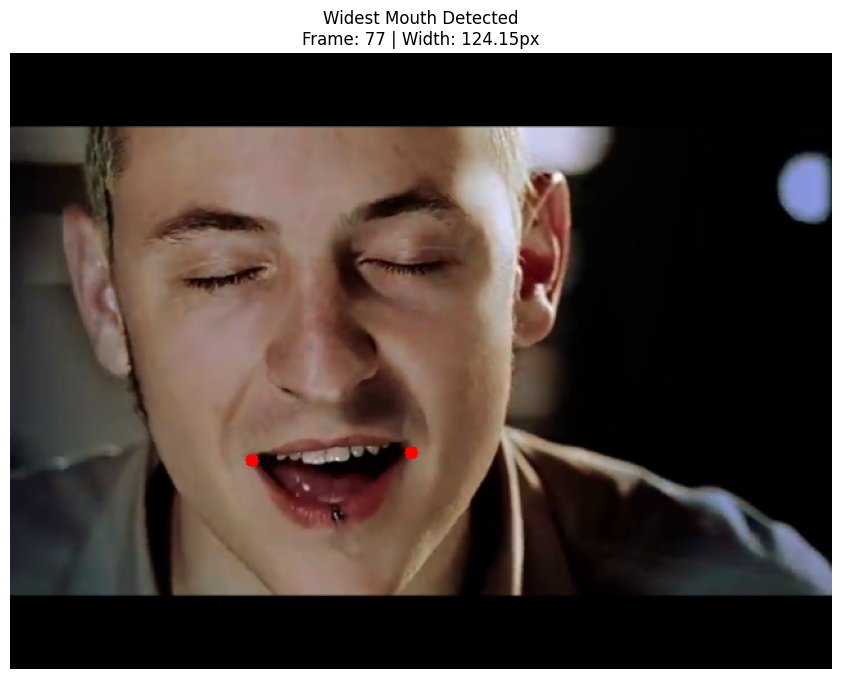

In [44]:
if frames_data:
    #Draw the dots on the winner
    winner_img = best_entry['image'].copy()
    l_corner = best_entry['landmarks'][48].astype(int)
    r_corner = best_entry['landmarks'][54].astype(int)
    
    cv2.circle(winner_img, tuple(l_corner), 5, (255, 0, 0), -1) # Red Dot in OpenCV (RGB)
    cv2.circle(winner_img, tuple(r_corner), 5, (255, 0, 0), -1) # Red Dot in OpenCV (RGB)
    
    # Display the result
    plt.figure(figsize=(12, 8))
    plt.imshow(winner_img)
    plt.title(f"Widest Mouth Detected\nFrame: {best_entry['frame_index']} | Width: {best_entry['width']:.2f}px")
    plt.axis('off')
    plt.show()
else:
    print("No faces were detected in the video.")

## Landmark verification proof

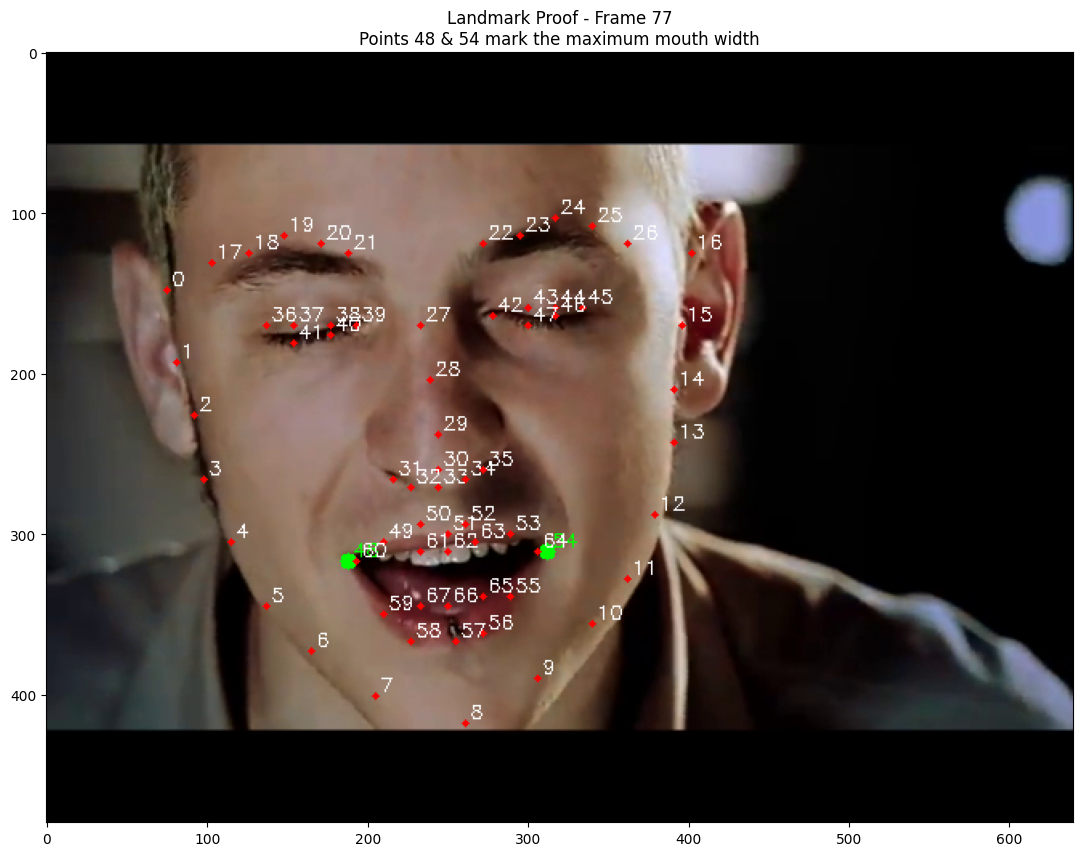

In [47]:
if frames_data:
    
    # All 68 points and their index numbers
    for n in range(0, 68):
        x, y = landmarks[n].astype(int)
        
        # Color specific points differently
        if n in [48, 54]:
            cv2.circle(winner_img, (x, y), 5, (0, 255, 0), -1) # Green for width corners
            color = (0, 255, 0)
        else:
            cv2.circle(winner_img, (x, y), 2, (255, 0, 0), -1) # Red for others
            color = (255, 255, 255) # White for general numbers
            
        # Draw the index number next to the dot
        cv2.putText(winner_img, str(n), (x + 3, y - 3), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, color, 1)

    # Display the proof
    plt.figure(figsize=(15, 10))
    plt.imshow(winner_img)
    plt.title(f"Landmark Proof - Frame {best_entry['frame_index']}\nPoints 48 & 54 mark the maximum mouth width")
    plt.axis('on')
    plt.show()